# PCA exercise

##### Use the principal component analysis (PCA) technique and analyze the results. 

\* *I will not add too much documentation details in this Jupyter since is very well documented in this other PCA exercise that I published [here](https://github.com/jrbayguade/DataTreatment_DimensionalityReduction_PCA/blob/PCA_Class/T7_1_PCA_Principal_Component_Analysis.ipynb)*

In [43]:
import sklearn.datasets as datasets
import pandas as pd

# Load the data from scikit.learn
dataset = datasets.load_breast_cancer()

# Convert to a more useful dataframe
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

y = dataset.target  # This defines y so we can use it later

# Take a look
df.sample(15)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
335,17.060,21.00,111.80,918.6,0.11190,0.10560,0.150800,0.099340,0.1727,0.06071,...,20.99,33.15,143.20,1362.0,0.14490,0.20530,0.39200,0.18270,0.2623,0.07599
332,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
118,15.780,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.094790,0.2096,0.07331,...,20.19,30.50,130.30,1272.0,0.18550,0.49250,0.73560,0.20340,0.3274,0.12520
492,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.117000,0.077620,0.2116,0.06077,...,21.53,26.06,143.40,1426.0,0.13090,0.23270,0.25440,0.14890,0.3251,0.07625
28,15.300,25.27,102.40,732.4,0.10820,0.16970,0.168300,0.087510,0.1926,0.06540,...,20.27,36.71,149.30,1269.0,0.16410,0.61100,0.63350,0.20240,0.4027,0.09876
138,14.950,17.57,96.85,678.1,0.11670,0.13050,0.153900,0.086240,0.1957,0.06216,...,18.55,21.43,121.40,971.4,0.14110,0.21640,0.33550,0.16670,0.3414,0.07147
283,16.240,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.090520,0.1876,0.06684,...,18.55,25.09,126.90,1031.0,0.13650,0.47060,0.50260,0.17320,0.2770,0.10630
290,14.410,19.73,96.03,651.0,0.08757,0.16760,0.136200,0.066020,0.1714,0.07192,...,15.77,22.13,101.70,767.3,0.09983,0.24720,0.22200,0.10210,0.2272,0.08799
235,14.030,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,...,15.33,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617
140,9.738,11.97,61.24,288.5,0.09250,0.04102,0.000000,0.000000,0.1903,0.06422,...,10.62,14.10,66.53,342.9,0.12340,0.07204,0.00000,0.00000,0.3105,0.08151


In [44]:
# Data standarization
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Standardize features (critical for PCA)
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

In [45]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_std)

In [46]:
# Compute the eigenvalues and eigenvectors
# 1. Eigenvalues (Explained Variance)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 2. Loadings (Component Coefficients)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Print results
print("Explained Variance Ratios:", explained_variance)
print("Cumulative Variance:", cumulative_variance)
print("\nLoadings (PC1 and PC2):")

for i, feature in enumerate(df.columns[1:]):
    print(f"{feature}: PC1={loadings[i, 0]:.2f}, PC2={loadings[i, 1]:.2f}")

Explained Variance Ratios: [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
Cumulative Variance: [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]

Loadings (PC1 and PC2):
mean texture: PC1=0.80, PC2=-0.56
mean perimeter: PC1=0.38, PC2=-0.14
mean area: PC1=0.83, PC2=-0.51
mean smoothness: PC1=0.81, PC2=

In [47]:
# Eigenvectors (PCs) table
# Create a DataFrame with the eigenvectors (PCs) and variable names
eigenvectors_df = pd.DataFrame(
    pca.components_.T, # Transpose to get variables as rows
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df.columns
)

# Just round to 3 decimal places
eigenvectors_df_rounded = eigenvectors_df.round(3)

# Show table
print("\nEigenvectors table:")
print(eigenvectors_df_rounded.to_markdown())


Eigenvectors table:
|                         |   PC1 |    PC2 |    PC3 |    PC4 |    PC5 |    PC6 |    PC7 |    PC8 |    PC9 |   PC10 |   PC11 |   PC12 |   PC13 |   PC14 |   PC15 |   PC16 |   PC17 |   PC18 |   PC19 |   PC20 |   PC21 |   PC22 |   PC23 |   PC24 |   PC25 |   PC26 |   PC27 |   PC28 |   PC29 |   PC30 |
|:------------------------|------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|
| mean radius             | 0.219 | -0.234 | -0.009 | -0.041 | -0.038 |  0.019 | -0.124 | -0.007 | -0.223 |  0.095 |  0.041 | -0.051 | -0.012 |  0.06  | -0.051 |  0.151 |  0.203 |  0.147 | -0.225 | -0.05  |  0.069 | -0.073 |  0.099 |  0.183 |  0.019 |  0.129 | -0.132 | -0.211 | -0.211 |  0.702 |
| mean texture            | 0.104 | -0.06  |  0.065 |  0.603 |  0.049 | -0.032 |  0.011 

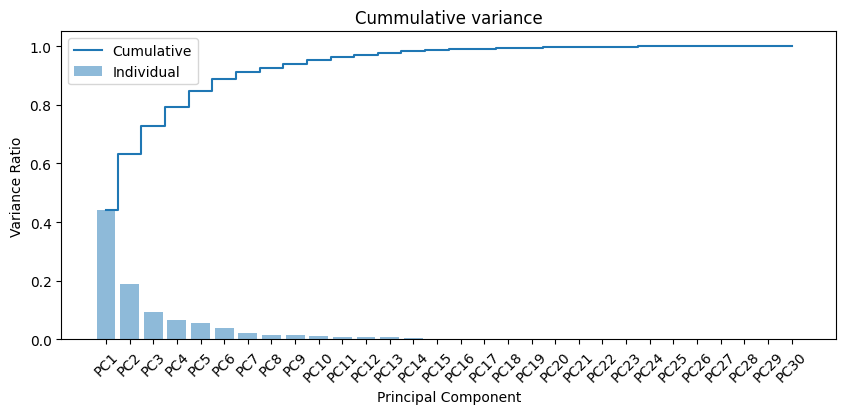

In [48]:
# Cummulative variance
import matplotlib.pyplot as plt

components = np.arange(1, len(explained_variance) + 1)

# Variance plot
plt.figure(figsize=(10, 4))
plt.bar(components, explained_variance, alpha=0.5, align='center', label='Individual')
plt.step(components, cumulative_variance, where='mid', label='Cumulative')

# Personalize the x axis for better readability (and facilitate comprehension)
components_labels = [f'PC{x}' for x in components]
plt.xticks(ticks=components, labels=components_labels, rotation=45)


plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.legend()
plt.title("Cummulative variance")
plt.show()

☝️ Interpretation of the chart above: 
- PC1 and PC2 explain approximately ~60% of the variance.
- From PC1 to PC6 we have captured ~80% of the variance. This translates into an apparent decent utility of the PCA technique

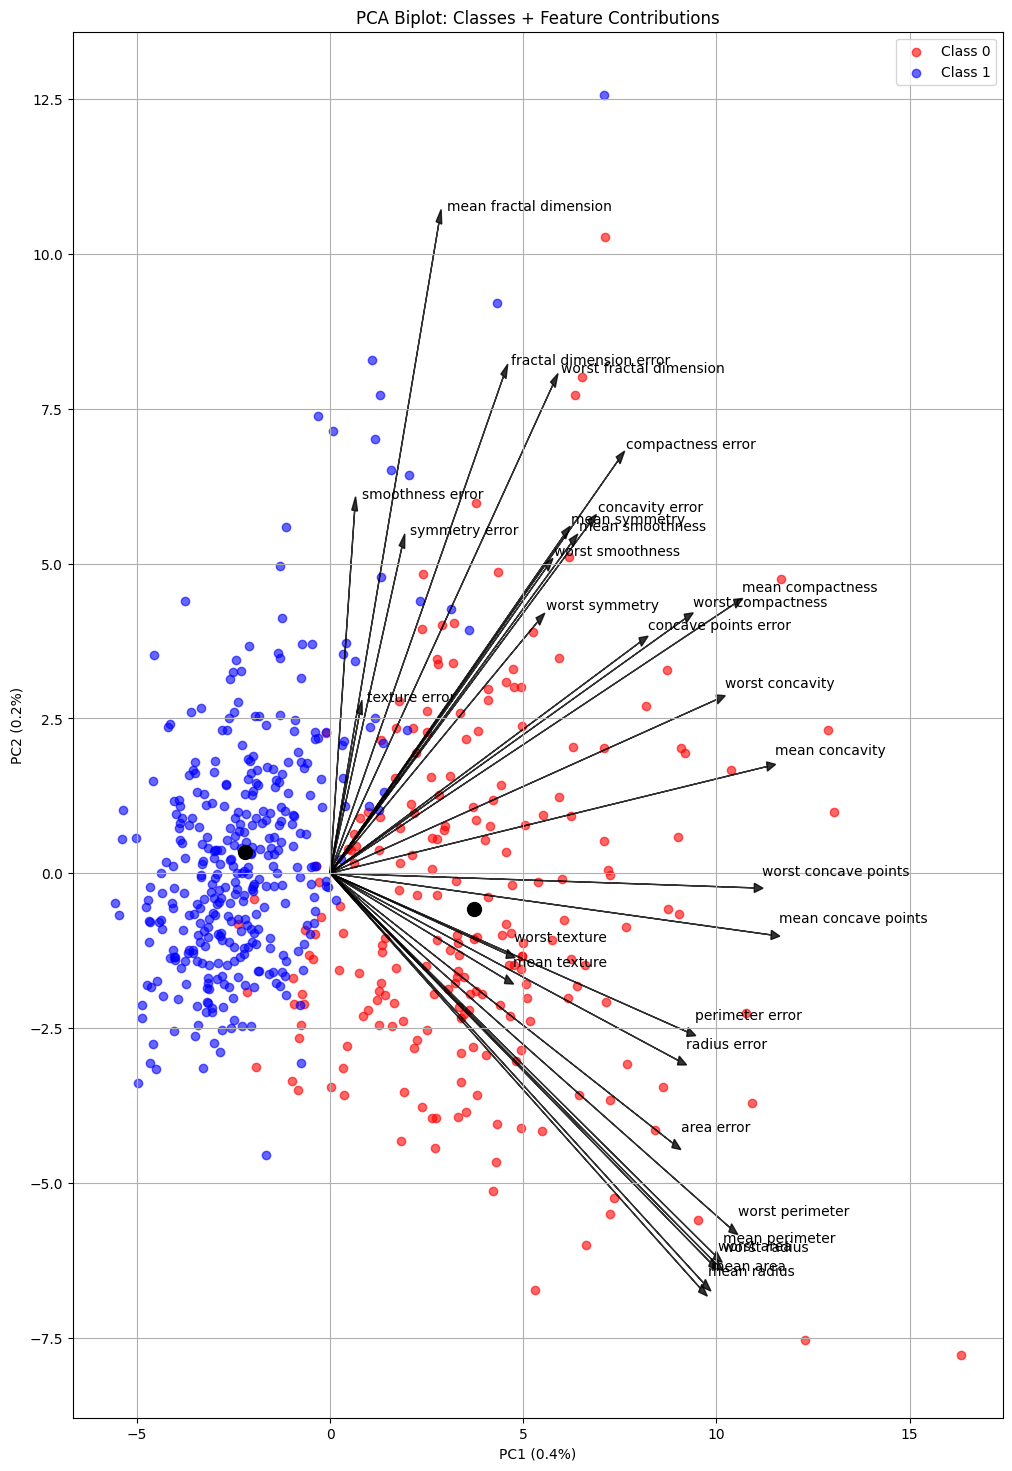

In [49]:
# Biplot (Features + Samples)
plt.figure(figsize=(12, 18))

for l, c in zip(np.unique(y), ('r', 'b', 'g')):
    class_points = X_pca[y == l]
    plt.scatter(class_points[:, 0], class_points[:, 1], c=c, label=f'Class {l}', alpha=0.6)
    centroid = class_points.mean(axis=0)
    plt.plot(centroid[0], centroid[1], 'o', c='k', markersize=10)
    
# Add feature vectors
arrow_scale = 12
arrow_text_offset = 0.2

for i, feature in enumerate(df.columns):
    plt.arrow(0, 0, loadings[i, 0] * arrow_scale, loadings[i, 1] * arrow_scale, 
              color='Black', alpha=0.8, head_width=0.15)
    plt.text(loadings[i, 0] * arrow_scale + arrow_text_offset, loadings[i, 1] * arrow_scale + arrow_text_offset, 
             feature, color='Black')

# Labels and tittle
plt.xlabel('PC1 ({}%)'.format(round(explained_variance[0], 1)))
plt.ylabel('PC2 ({}%)'.format(round(explained_variance[1], 1)))
plt.title("PCA Biplot: Classes + Feature Contributions")
plt.legend()
plt.grid()
plt.show()

☝️ Interpretation of the chart above: 

- **Points (Red and Blue)**: Each point represents a data sample (a breast cancer diagnosis) projected onto the first two principal components (PC1 and PC2). The colors indicate the class: red (0) represents the malignant class and blue the benign class
- There is a quite strong **separation of the classes** in the 2D space. That implies an effective discrimination between the two classes by the first two PCs (specially along PC1)
- **Arrows directions**: The direction of an arrow indicates the principal component with which the feature is most strongly correlated. For example, arrows pointing towards the right are positively correlated with PC1, while those pointing upwards are positively correlated with PC2.   
- **Longest arrows** imply those features are the most influential in distinguishing the data along the two PCs. This aligns well with the earlier observation that the first few PCs capture most of the variance.
- **Model building** it could be interesting to proceed to build classification models using either all the features or the top few principal components (probably the first 7 as suggested by the variance plot). Compare then the performance of models trained on both datasets can demonstrate the effectiveness of the PCA for dimensionality in this context. 
<br><br>

**<div class="alert alert-block alert-info">Important observation**: It is quite possible that this PCA has limitations in terms of how much variance is captured by the first few principal components and how well the classes are separated. Let's examine biplots of other pairs of principal components (e.g., PC1 vs. PC3, PC2 vs. PC3) to see if other aspects of the data are revealed. Otherwise we would need to work on different dimensionality reduction techniques or aproaches
</div>

NameError: name 'feature_names' is not defined

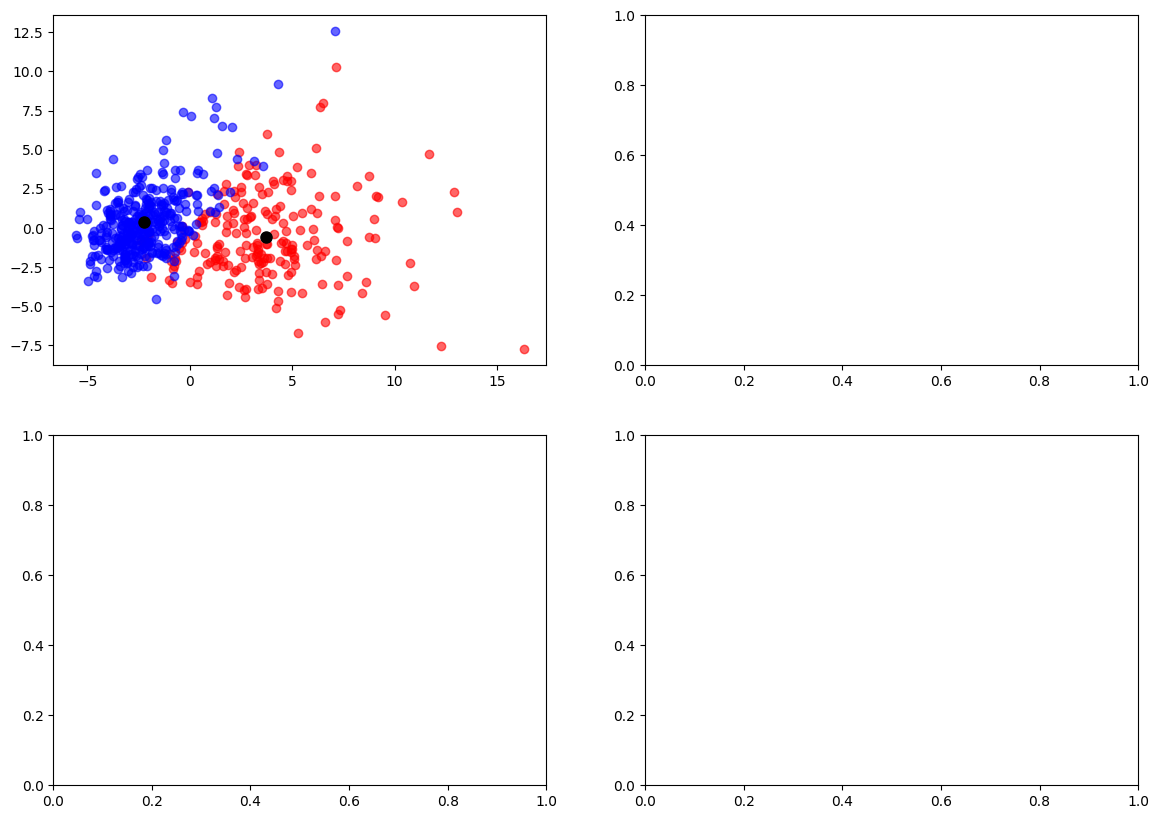

In [ ]:
# Let's examine biplots of other pairs of principal components (e.g., PC1 vs. PC3, PC2 vs. PC3) 
# to see if other aspects of the data are revealed.


# Define function to plot biplots in a more polished way
def biplot(pca_scores, loadings, explained_variance, pc_x=0, pc_y=1, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Plot samples
    colors = ['r', 'b']
    labels = np.unique(y)
    for label, color in zip(labels, colors):
        idx = y == label
        ax.scatter(pca_scores[idx, pc_x], pca_scores[idx, pc_y],
                   c=color, label=f'Class {label}', alpha=0.6)

    # Plot centroids
    for label, color in zip(labels, colors):
        centroid = pca_scores[y == label].mean(axis=0)
        ax.plot(centroid[pc_x], centroid[pc_y], 'ko', markersize=8)

    # Plot feature vectors
    scale_factor = 5
    for i, (name, loading) in enumerate(zip(dataset.feature_names, loadings)):
        ax.arrow(0, 0, loadings[i, pc_x] * scale_factor, loadings[i, pc_y] * scale_factor,
                 head_width=0.1, length_includes_head=True, color='Orange', alpha=0.5)
        ax.text(loadings[i, pc_x] * scale_factor * 1.1,
                loadings[i, pc_y] * scale_factor * 1.1,
                name, color='Orange', fontsize=8)

    ax.set_xlabel(f'PC{pc_x + 1} ({explained_variance[pc_x]:.1%})')
    ax.set_ylabel(f'PC{pc_y + 1} ({explained_variance[pc_y]:.1%})')
    ax.set_title(f'PCA Biplot: PC{pc_x + 1} vs PC{pc_y + 1}')
    ax.grid(True)
    ax.legend()

    # Create subplots for different PC combinations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
biplot(X_pca, loadings, explained_variance, pc_x=0, pc_y=1, ax=axes[0, 0])
biplot(X_pca, loadings, explained_variance, pc_x=0, pc_y=2, ax=axes[0, 1])
biplot(X_pca, loadings, explained_variance, pc_x=1, pc_y=2, ax=axes[1, 0])
biplot(X_pca, loadings, explained_variance, pc_x=2, pc_y=3, ax=axes[1, 1])

plt.tight_layout()
plt.show()